In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import multivariate_normal, norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR

from warnings import filterwarnings
filterwarnings('ignore')

#### 1. PipeLine Ingesta de Datos

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
mapeo_clasificacion = {
    "setosa": 0,
    "versicolor": 1,
    "virginica": 2
}

data["Species_encoded"] = data["Species"].map(mapeo_clasificacion)
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


#### 2.Pipeline Analisis Exploratorio de los Datos

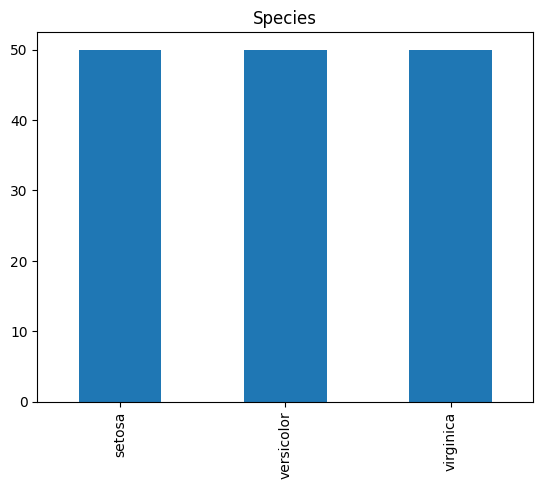

In [4]:
# 1. Realizamos un análisis explortorio tanto visual como formal y extraiga conclusiones
import matplotlib.pyplot as plt

# Iteramos sobre las columnas categóricas y hacemos un gráfico de barras para cada una de ellas
for col in data.select_dtypes(include=['object']):
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

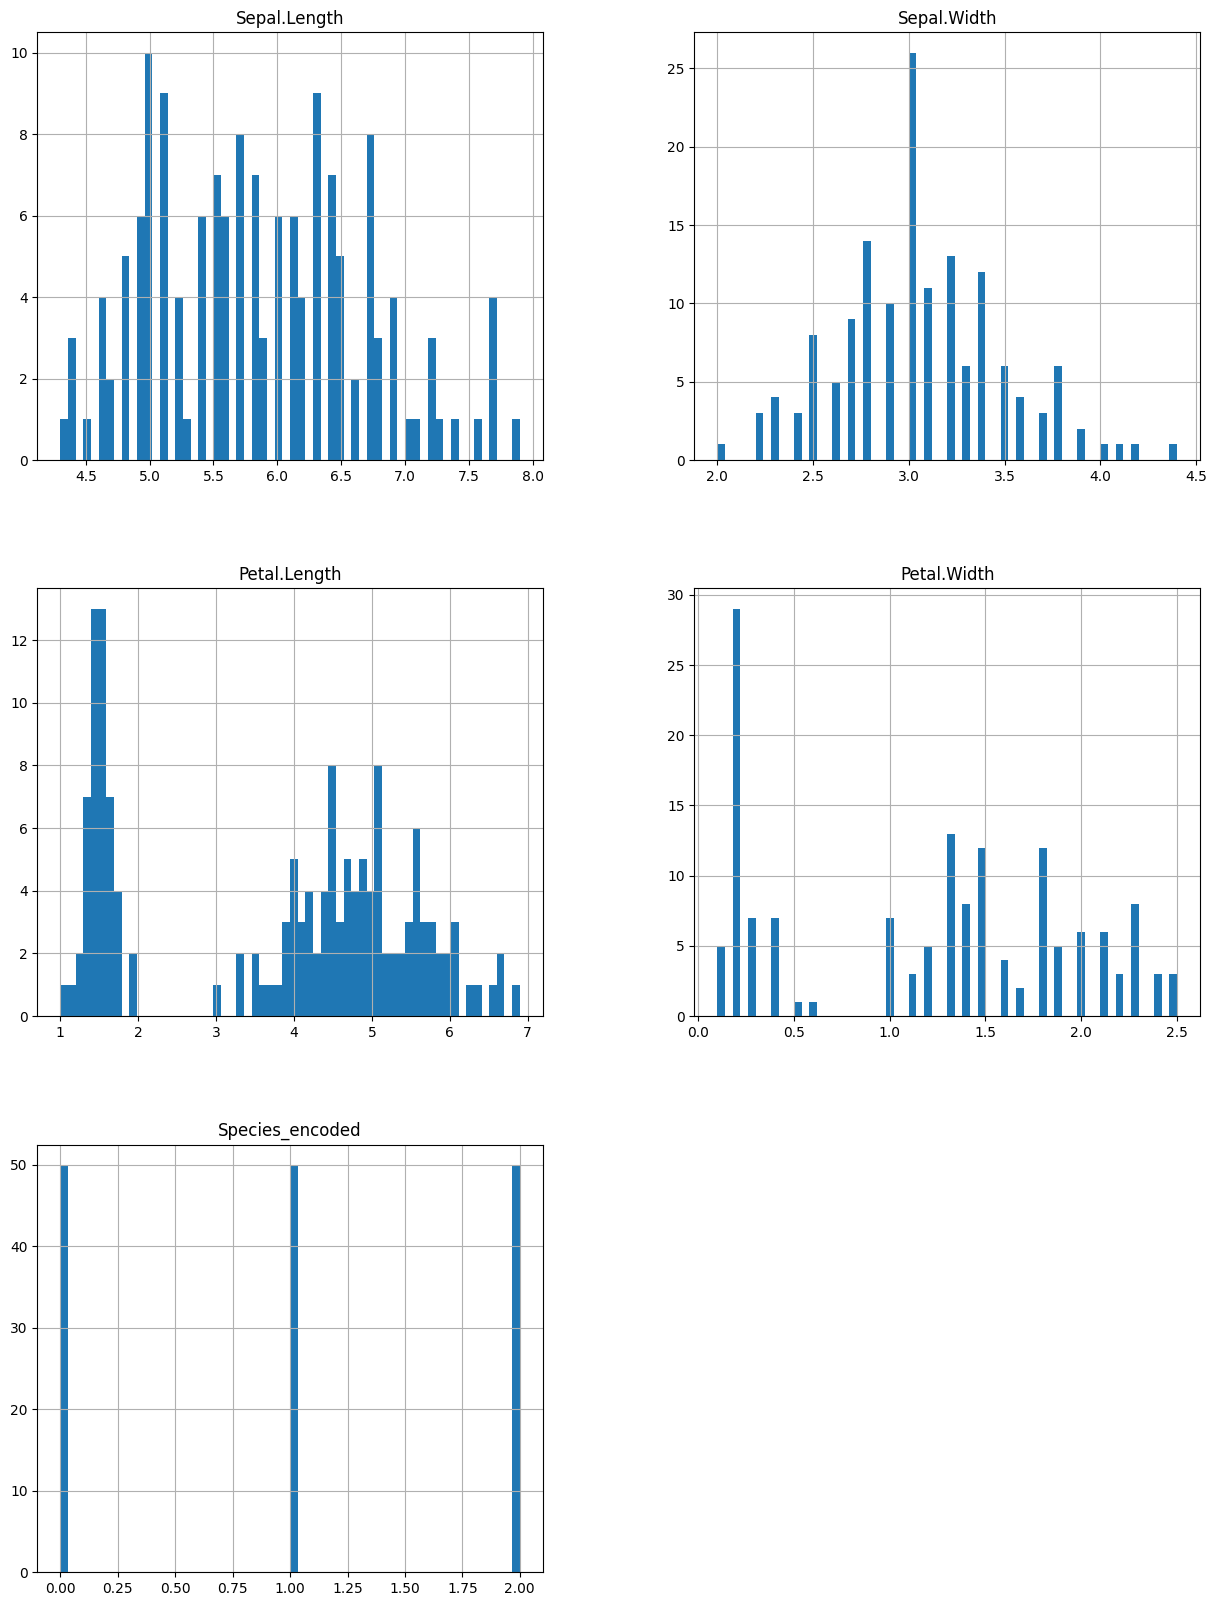

In [5]:
data.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [6]:
# calcular estadísticas descriptivas para variables numéricas
print(data.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species_encoded
count    150.000000   150.000000    150.000000   150.000000       150.000000
mean       5.843333     3.057333      3.758000     1.199333         1.000000
std        0.828066     0.435866      1.765298     0.762238         0.819232
min        4.300000     2.000000      1.000000     0.100000         0.000000
25%        5.100000     2.800000      1.600000     0.300000         0.000000
50%        5.800000     3.000000      4.350000     1.300000         1.000000
75%        6.400000     3.300000      5.100000     1.800000         2.000000
max        7.900000     4.400000      6.900000     2.500000         2.000000


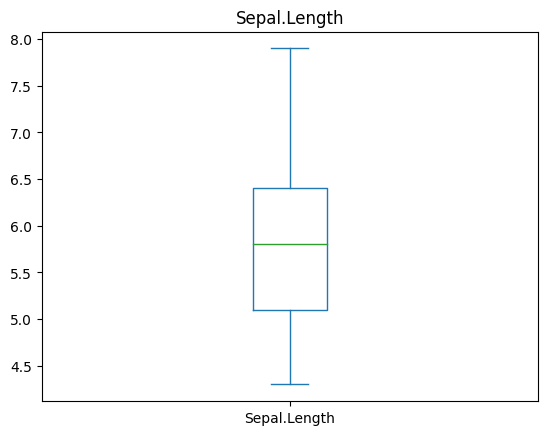

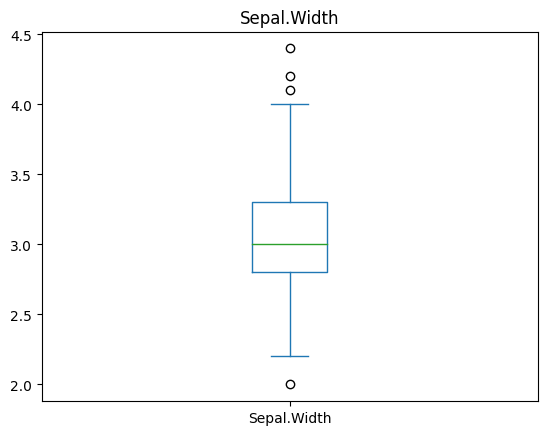

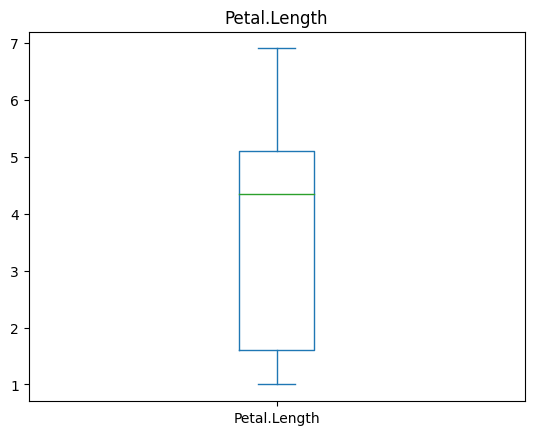

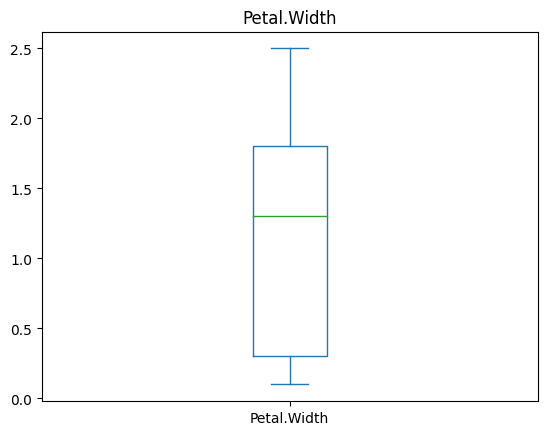

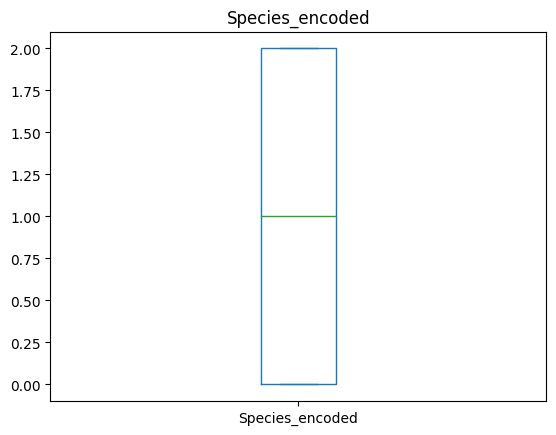

In [7]:
for col in data.select_dtypes(include=['int', 'float']):
    data[col].plot(kind='box')
    plt.title(col)
    plt.show()

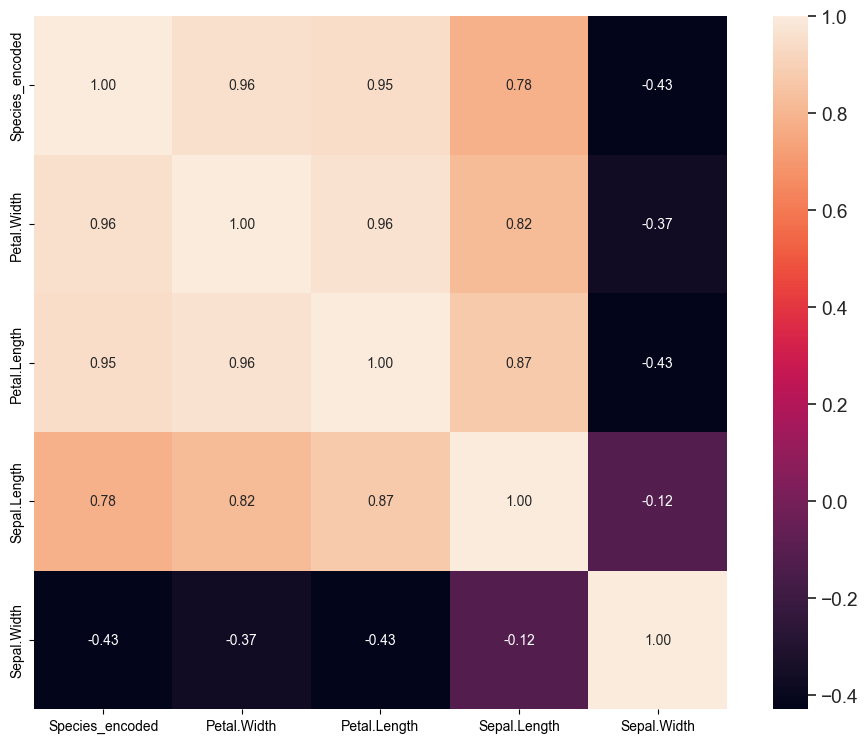

In [8]:
# SalePrice correlation matrix
# Correlation matrix
import seaborn as sns
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))

k = 8
cols = corrmat.nlargest(k, 'Species_encoded')['Species_encoded'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### 3. Pipeline Entrenamiento del Modelo

In [9]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [10]:
data.loc[:, ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = data.loc[:, data.columns == 'Species_encoded']
X = data.loc[:, ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Creacmos la instancia del modelo de Regresion Logistica
logisticRegr = LogisticRegression(penalty='l2', C = 0.03,max_iter=1000)

# Entrenamiento del Modelo
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=0.03, max_iter=1000)

### 4- Pipeline de Evaluacion del Modelo

In [12]:
# Performance
y_pred = logisticRegr.predict(x_test)
print('El accuracy de nuestra regresión logística en el set de test es: {:.2f}'.format(logisticRegr.score(x_test, y_test)))

El accuracy de nuestra regresión logística en el set de test es: 0.90


In [13]:
coeficientes= pd.DataFrame(logisticRegr.coef_[0], 
                X.columns, 
                columns=['coef'])
coeficientes

,coef
Sepal.Length,-0.184532
Sepal.Width,0.161753
Petal.Length,-0.652992
Petal.Width,-0.266676


In [14]:
y_pred

array([2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2,
       0, 1, 2, 0, 0, 2, 1, 2], dtype=int64)

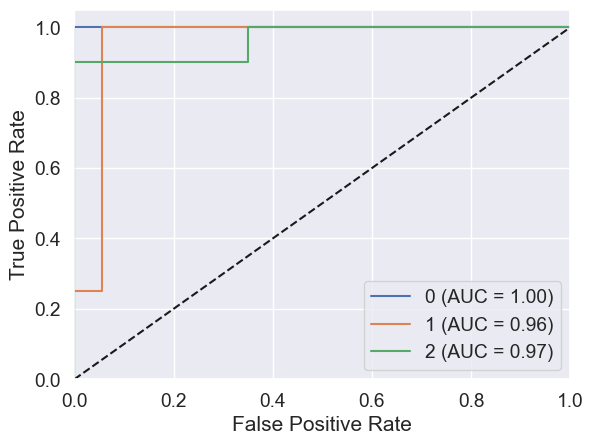

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Crear una figura para trazar las curvas ROC
plt.figure()

# Obtener las clases únicas de tu variable objetivo (y_test)
classes = np.unique(y_test)

# Calcular y trazar curvas ROC para cada clase
for class_name in classes:
    y_true_class = (y_test == class_name).astype(int)
    y_score_class = logisticRegr.predict_proba(x_test)[:, class_name]  # Usar mapeo_clasificacion para obtener el índice correcto
    fpr, tpr, _ = roc_curve(y_true_class, y_score_class)
    roc_auc = roc_auc_score(y_true_class, y_score_class)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

# Configurar el gráfico
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Obtén las predicciones de tu modelo
y_pred = logisticRegr.predict(x_test)

# Define las etiquetas de clase numéricas
etiquetas_clases = [0, 1, 2]

# Calcula la matriz de confusión con etiquetas de clase numéricas
confusion = confusion_matrix(y_test, y_pred, labels=etiquetas_clases)

# Crea un DataFrame para mostrar la matriz de confusión con etiquetas
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=etiquetas_clases, columns=etiquetas_clases)

print("Matriz de Confusión:")
print(confusion_df)

# Calcula la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy * 100:.2f}%")

# Calcula los porcentajes en la matriz de confusión
confusion_porcentajes = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100

# Crea un DataFrame para mostrar la matriz de confusión en porcentajes
confusion_porcentajes_df = pd.DataFrame(confusion_porcentajes, index=etiquetas_clases, columns=etiquetas_clases)

print("Matriz de Confusión en Porcentajes:")
print(confusion_porcentajes_df)

Matriz de Confusión:
   0   1  2
0  8   0  0
1  0  10  2
2  0   1  9
Precisión (Accuracy): 90.00%
Matriz de Confusión en Porcentajes:
       0          1          2
0  100.0   0.000000   0.000000
1    0.0  83.333333  16.666667
2    0.0  10.000000  90.000000


#### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200, max_depth=5)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Obtén las predicciones de tu modelo
y_pred = model_rf.predict(x_test)

# Define las etiquetas de clase numéricas
etiquetas_clases = [0, 1, 2]

# Calcula la matriz de confusión con etiquetas de clase numéricas
confusion = confusion_matrix(y_test, y_pred, labels=etiquetas_clases)

# Crea un DataFrame para mostrar la matriz de confusión con etiquetas
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=etiquetas_clases, columns=etiquetas_clases)

print("Matriz de Confusión:")
print(confusion_df)

# Calcula la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy * 100:.2f}%")

# Calcula los porcentajes en la matriz de confusión
confusion_porcentajes = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100

# Crea un DataFrame para mostrar la matriz de confusión en porcentajes
confusion_porcentajes_df = pd.DataFrame(confusion_porcentajes, index=etiquetas_clases, columns=etiquetas_clases)

print("Matriz de Confusión en Porcentajes:")
print(confusion_porcentajes_df)

Matriz de Confusión:
   0   1  2
0  8   0  0
1  0  11  1
2  0   1  9
Precisión (Accuracy): 93.33%
Matriz de Confusión en Porcentajes:
       0          1          2
0  100.0   0.000000   0.000000
1    0.0  91.666667   8.333333
2    0.0  10.000000  90.000000


#### XGB (Gradient Bossting)

In [19]:
#!pip install xgboost
from xgboost.sklearn import XGBClassifier
model_XGB = XGBClassifier(n_estimators=200, max_depth=5)
model_XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Obtén las predicciones de tu modelo
y_pred = model_XGB.predict(x_test)

# Define las etiquetas de clase numéricas
etiquetas_clases = [0, 1, 2]

# Calcula la matriz de confusión con etiquetas de clase numéricas
confusion = confusion_matrix(y_test, y_pred, labels=etiquetas_clases)

# Crea un DataFrame para mostrar la matriz de confusión con etiquetas
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=etiquetas_clases, columns=etiquetas_clases)

print("Matriz de Confusión:")
print(confusion_df)

# Calcula la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy * 100:.2f}%")

# Calcula los porcentajes en la matriz de confusión
confusion_porcentajes = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100

# Crea un DataFrame para mostrar la matriz de confusión en porcentajes
confusion_porcentajes_df = pd.DataFrame(confusion_porcentajes, index=etiquetas_clases, columns=etiquetas_clases)

print("Matriz de Confusión en Porcentajes:")
print(confusion_porcentajes_df)

Matriz de Confusión:
   0   1  2
0  8   0  0
1  0  11  1
2  0   1  9
Precisión (Accuracy): 93.33%
Matriz de Confusión en Porcentajes:
       0          1          2
0  100.0   0.000000   0.000000
1    0.0  91.666667   8.333333
2    0.0  10.000000  90.000000


In [21]:
import pickle

# Supongamos que tienes un modelo entrenado llamado 'modelo'
# Guardar el modelo en un archivo con extensión .pkl
with open('modelo_entrenado_XGB.pkl', 'wb') as model_file:
    pickle.dump(model_XGB, model_file)